In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set(color_codes = True)
import matplotlib.pyplot as plt
%matplotlib inline
import math
from IPython.display import display
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from imblearn.datasets import make_imbalance
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)
print('Seaborn version',sns.__version__)

Numpy version 1.19.2
Pandas version 1.3.5
Seaborn version 0.10.1


In [2]:
# Airline Passenger satisfication dataset
#df_airline =  pd.read_excel('Airline_Passenger_Complete_data.xlsx',sheet_name = 'Sheet1')
df_airline = pd.read_csv('Airline_Passenger_Data.csv')

In [3]:
# to display all columns in the dataset
pd.options.display.max_columns = None

In [4]:
# Function to detect missing values and duplicate records

def missing_duplicates(col):
    if col.isnull().sum().sum() == 0:
        print('There are no missing values in the dataset')
    else:
        print('There are missing values in the dataset')
        
    count = 0
    for count in col.columns:
        if col[count].isnull().sum() != 0:
            print('There are {} missing values in the feature: '.format(col[count].isnull().sum()),count)
            print('Percentage of missing values in the feature:',round(col[count].isnull().sum()/col.shape[0] * 100,3),'%')
            print('Percentage of missing values in total data points:',round(col[count].isnull().sum()/(col.shape[0]*col.shape[1]) * 100,3),'%')
            
    if col.duplicated().sum() == 0:
        print('There are no duplicate records found in the dataset')
    else:
        print('There are duplicate rows found in the dataset.','\nTotal duplicate rows:', col.duplicated.sum())

In [5]:
# Function to check balance of the target variable and countplot
def balance_ratio(col):
    print('Balance ratio of variable in Percentage')
    print(round(col.value_counts(normalize=True) * 100,2))
    print('')
    sns.countplot(col)
    plt.title('Count plot')
    plt.show()

In [6]:
# Fuctions to plot the graphs for countplot, histograms and boxplot

# Function to plot the graph of countplots
def countplots(col,figsize_len,figsize_wid,column):
    col = col.select_dtypes(include=['object'])
    plt.figure(figsize=(figsize_len,figsize_wid))
    a,b,c = math.ceil(col.shape[1]/column),column,1
    i = 0
    for i in col.columns:
        if col[i].dtype == 'object':
            plt.subplot(a,b,c)
            sns.countplot(x=col[i])
            c = c + 1
    plt.show()
    return

# Function to plot the graph of Histograms
def histogram(col,figsize_len,figsize_wid,column):
    col = col.select_dtypes(exclude='object')
    plt.figure(figsize=(figsize_len,figsize_wid))
    a,b,c = math.ceil(col.shape[1]/column),column,1
    i = 0
    for i in col.columns:
        if col[i].dtype != 'object':
            plt.subplot(a,b,c)
            sns.distplot(col[i])
            c = c + 1
    plt.show()
    return

# Function to plot the graph of boxplots
def boxplots(col,figsize_len,figsize_wid,column):
    col = col.select_dtypes(exclude='object')
    plt.figure(figsize=(figsize_len,figsize_wid))
    a,b,c = math.ceil(col.shape[1]/column),column,1
    i = 0
    for i in col.columns:
        if col[i].dtype != 'object':
            plt.subplot(a,b,c)
            sns.boxplot(col[i])
            c = c + 1
    plt.show()
    return

# Airline Passenger dataset

In [7]:
# now lets exlore the airline dataset

# checking the top 5 rows of the data
df_airline.head()

,Column1,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
# information of the data
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Column1                            129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [9]:
# describing the data
df_airline.describe().T

,count,mean,std,min,25%,50%,75%,max
Column1,129880.0,44158.700000,31207.377062,0.0,16234.75,38963.5,71433.25,103903.0
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0


In [10]:
# we will be dropping column1 feature since they are unique values of rows
# we will be dropping customer feature since they are unique values

df_airline.drop(columns=['Column1','id'], axis=1, inplace=True)

Balance ratio of variable in Percentage
neutral or dissatisfied    56.55
satisfied                  43.45
Name: satisfaction, dtype: float64



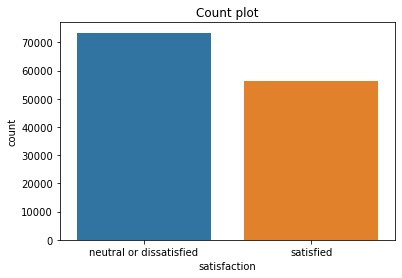

In [11]:
# Checking the target feature balance
balance_ratio(df_airline['satisfaction'])

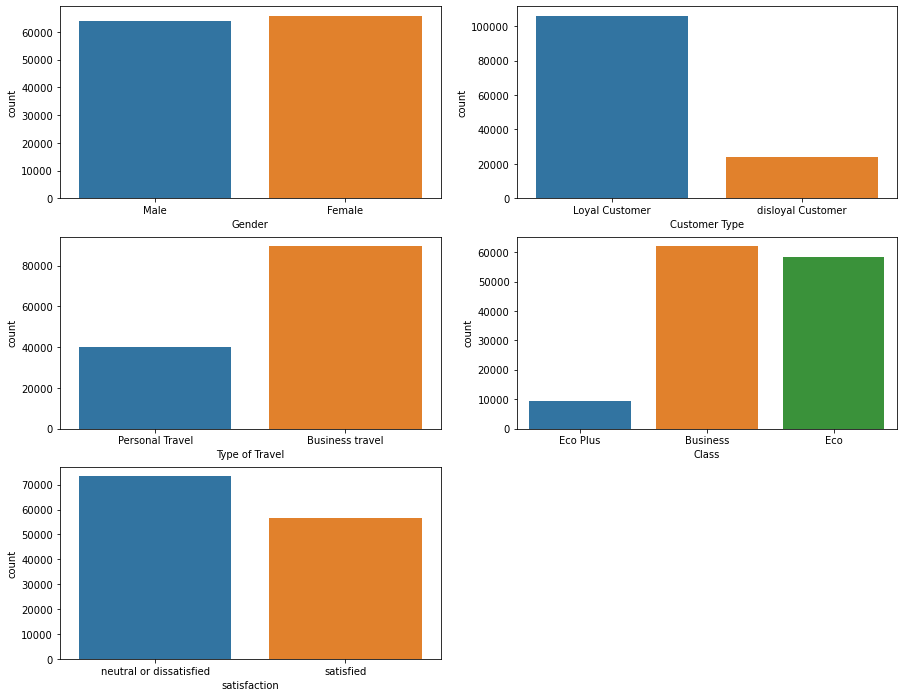

In [12]:
# we will check countplots for categorical variables
countplots(df_airline,15,12,2)

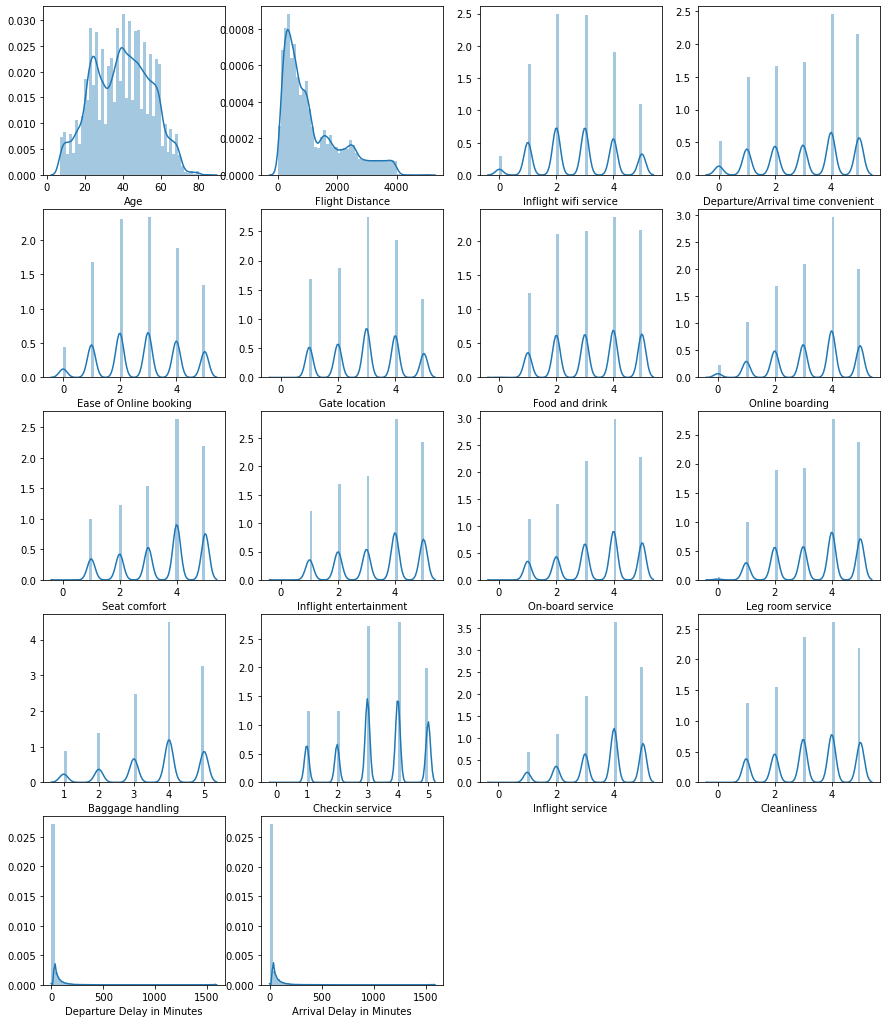

In [13]:
histogram(df_airline,15,18,4)

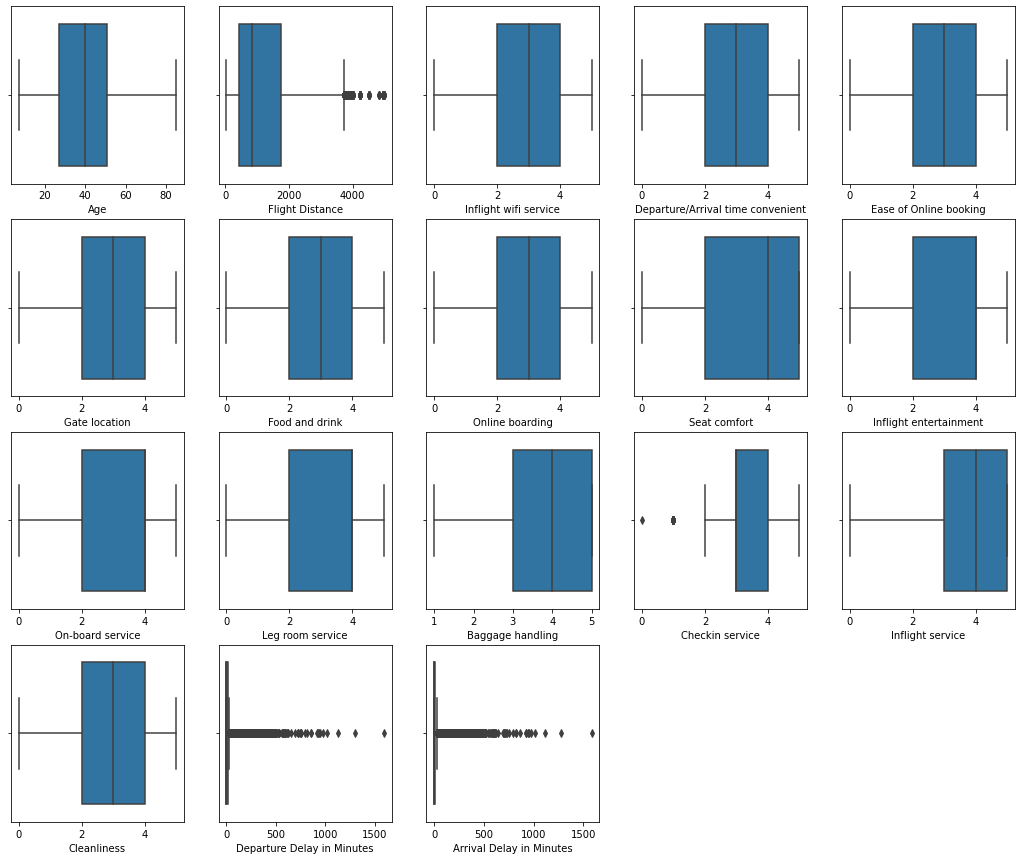

In [14]:
boxplots(df_airline,18,15,5)

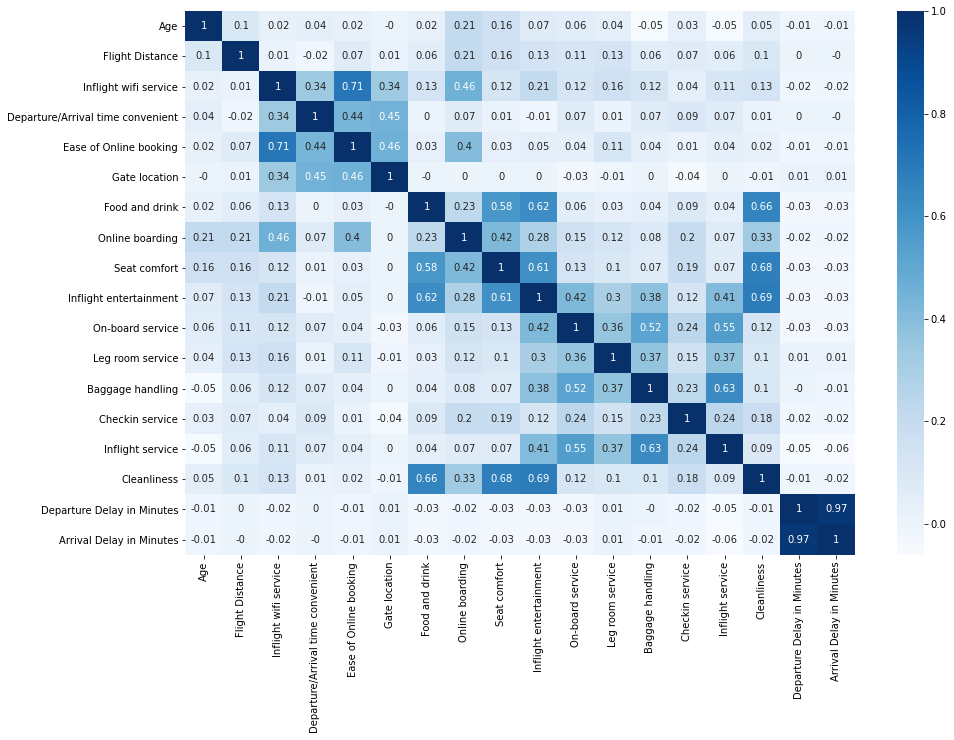

In [15]:
#Bivariate Analysis using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(round(df_airline.corr(),2),annot=True,cmap='Blues')
plt.show()

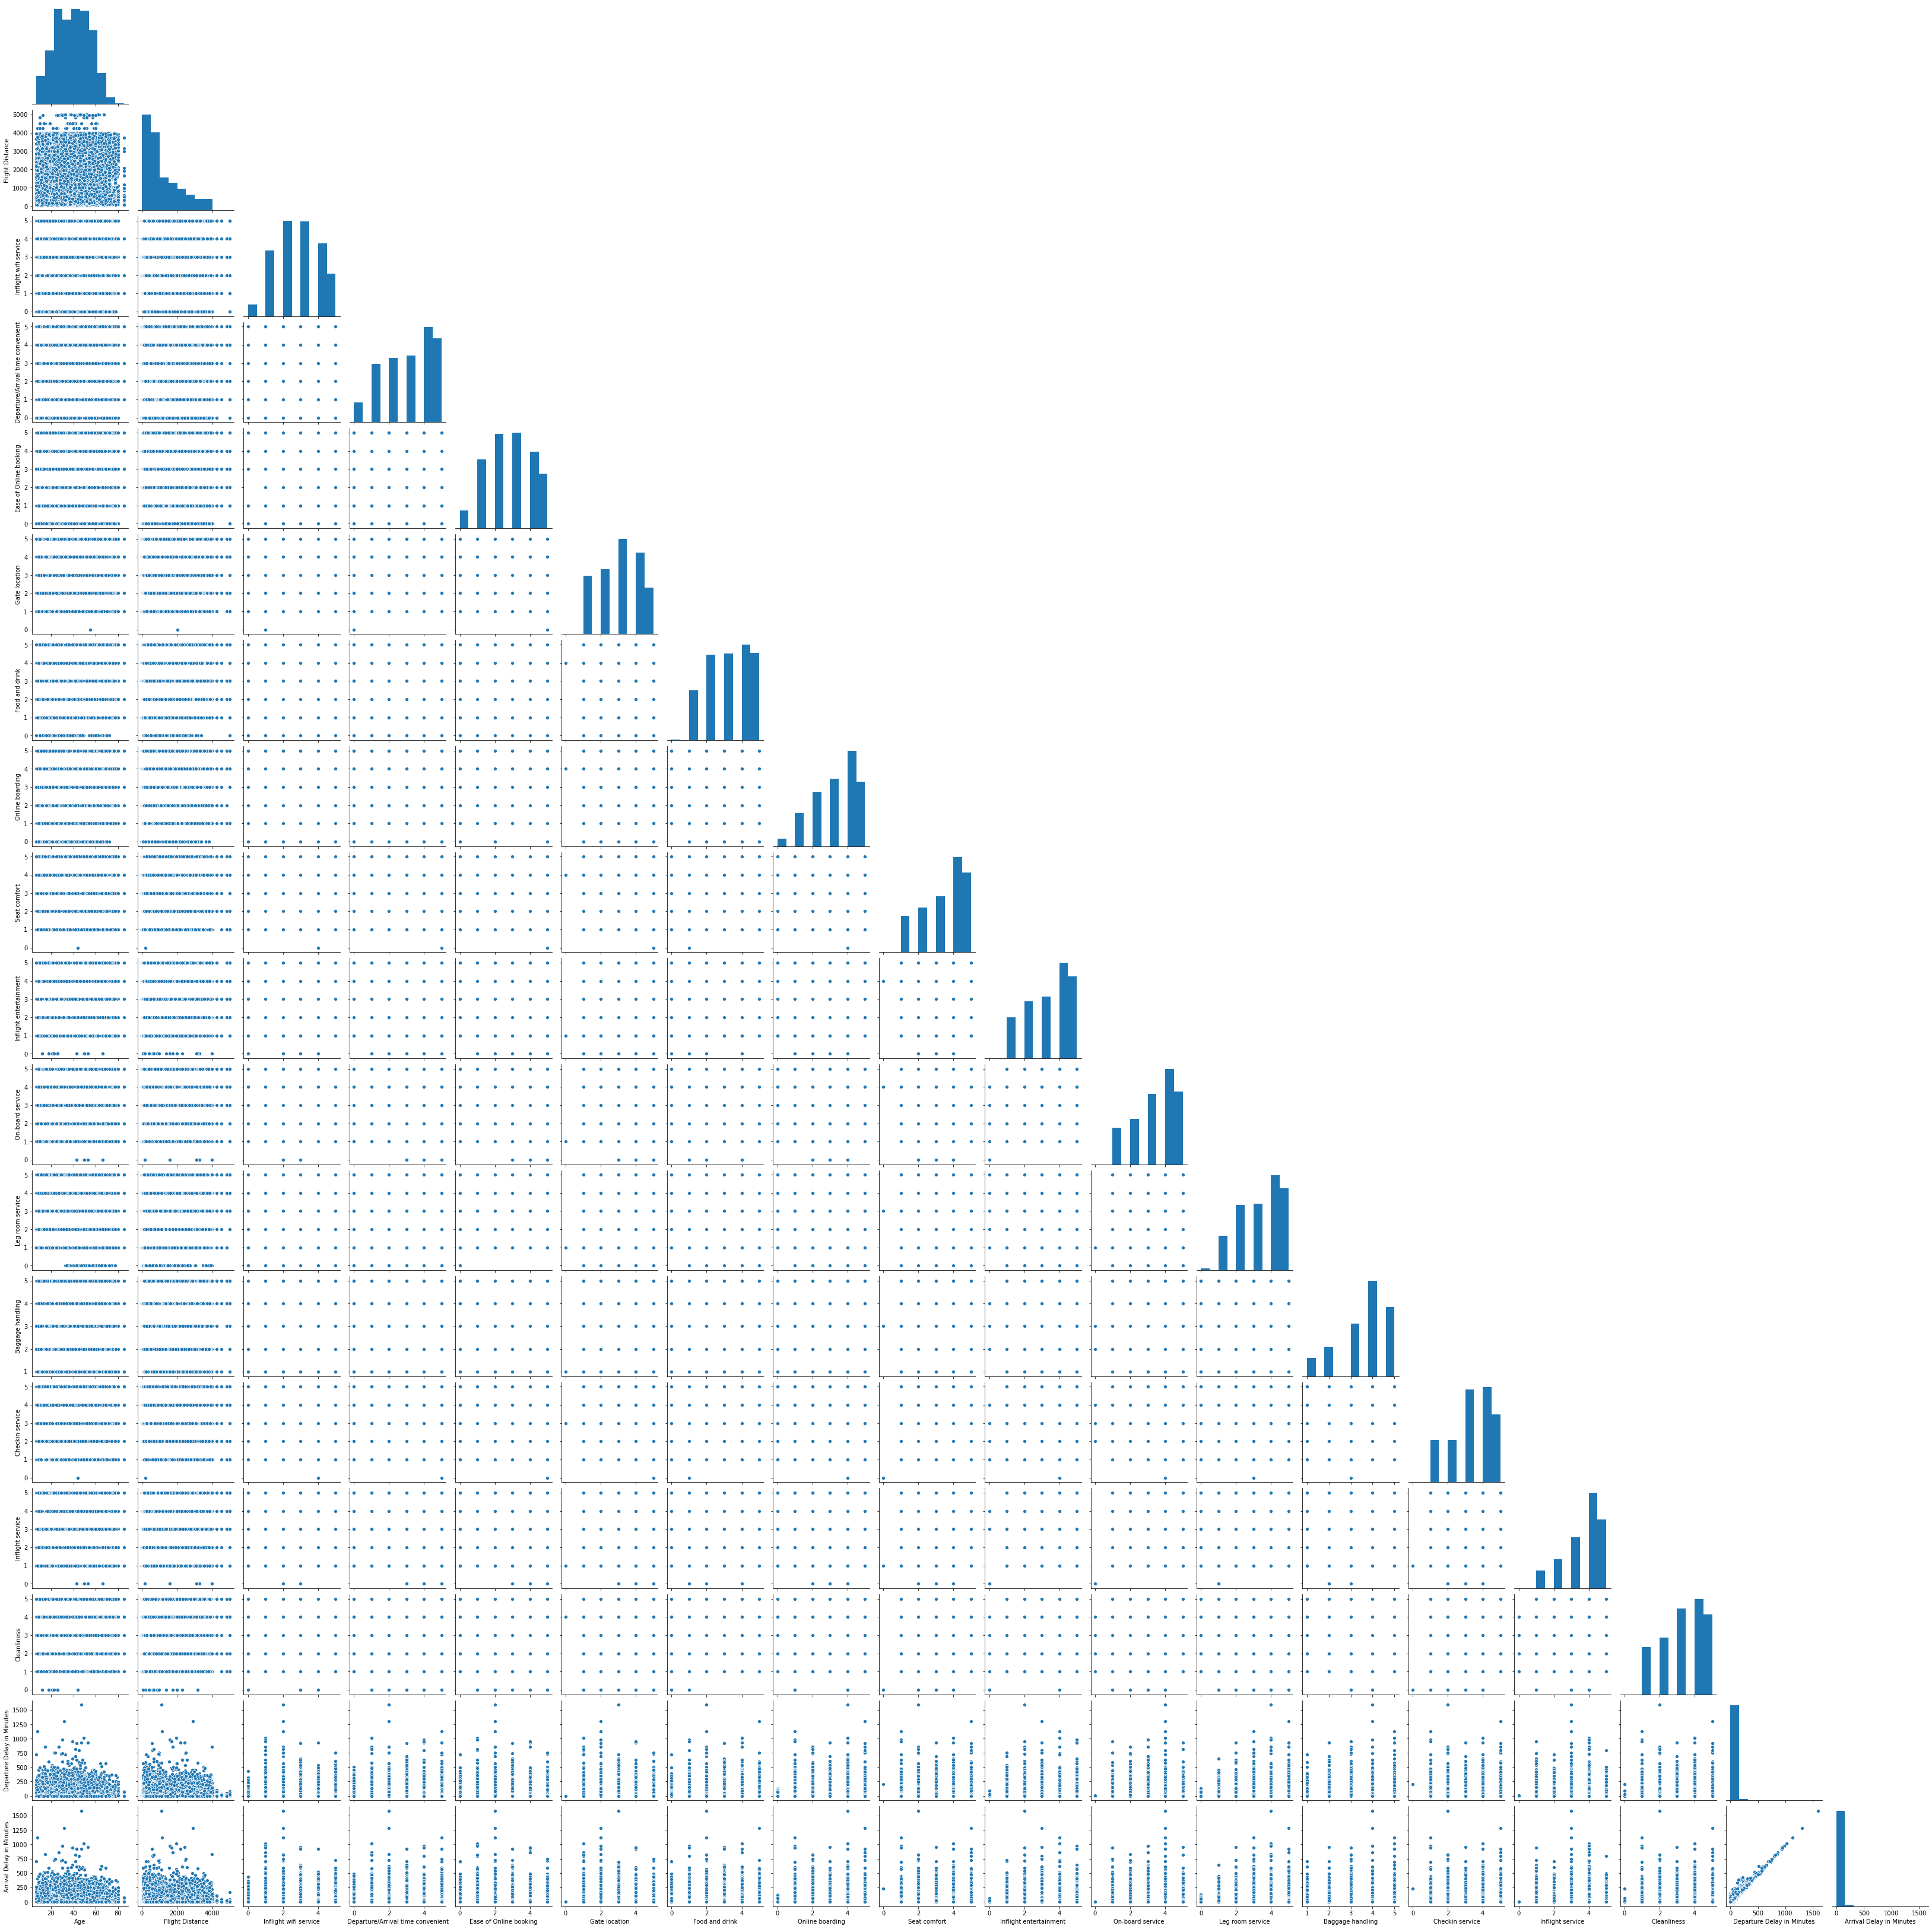

In [16]:
# pairplot
sns.pairplot(df_airline, corner=True)

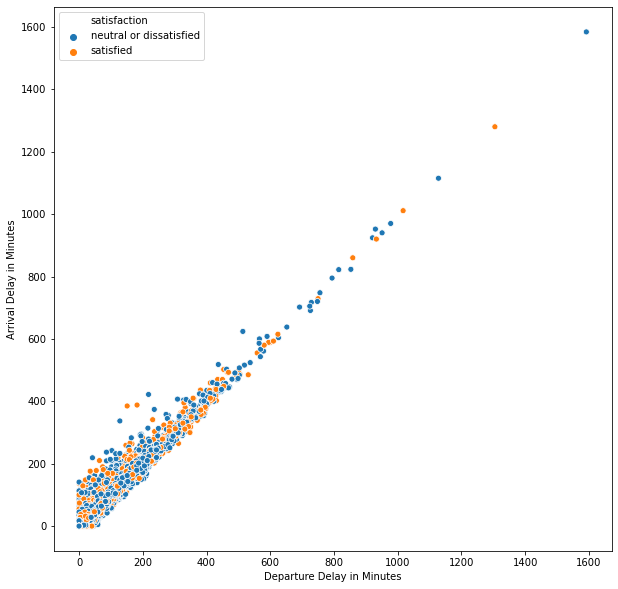

In [17]:
# Scatter plot with target variable
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_airline['Departure Delay in Minutes'], y=df_airline['Arrival Delay in Minutes'],hue=df_airline['satisfaction'])
plt.show()

In [18]:
# Checking for missing values and duplicate records
missing_duplicates(df_airline)

There are missing values in the dataset
There are 393 missing values in the feature:  Arrival Delay in Minutes
Percentage of missing values in the feature: 0.303 %
Percentage of missing values in total data points: 0.013 %
There are no duplicate records found in the dataset


In [19]:
# Since there are only 0.3% of missing values in "Arrival Delay in Minutes", we prefer to drop rows containing missing values
print('There are {} rows and {} columns before dropping null values:'.format(df_airline.shape[0],df_airline.shape[1]))
df_airline.dropna(axis=0, subset=['Arrival Delay in Minutes'], inplace=True)
print('There are {} rows and {} columns after dropping null values:'.format(df_airline.shape[0],df_airline.shape[1]))

There are 129880 rows and 23 columns before dropping null values:
There are 129487 rows and 23 columns after dropping null values:


In [20]:
# Checking for missing values and duplicate records after dropping null values
missing_duplicates(df_airline)

There are no missing values in the dataset
There are no duplicate records found in the dataset


In [21]:
# pulling column names
df_airline.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [22]:
# We will perform one hot encoding on all categorical variables.
# Drop_first is set to True in order to avoid multicolinearity and also it reduces number of features
# We will not encode the target variable i.e 'Satisfaction'
df_airline = pd.get_dummies(data=df_airline, columns=['Gender','Customer Type','Type of Travel','Class'], drop_first=True)
df_airline.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,1,0,0,0,0


In [23]:
# Function to create data imbalance
def create_imbalance(df,target_index,Perc):
    data = df.copy()
    
    # seperating independent and dependent variables
    X = data.drop(data.columns[target_index],axis=1)
    y = data.iloc[:,target_index]
    
    # creating imbalance from given percentage
    ratio1 = int(y.value_counts().sort_values(ascending=False)[0] * (Perc/100))
    ratio2 = int(y.value_counts().sort_values(ascending=False)[0]) - ratio1
    label1 = data.iloc[:,target_index].value_counts().sort_values(ascending=False).index[0]
    label2 = data.iloc[:,target_index].value_counts().sort_values(ascending=False).index[1]
    
    #making imbalance
    X_res, y_res = make_imbalance(X, y, sampling_strategy={label1:ratio1, label2:ratio2}, random_state=1)
    target_variable = data.columns[target_index]
    X_res[target_variable] = y_res
    
    return X_res

Balance ratio of variable in Percentage
neutral or dissatisfied    65.0
satisfied                  35.0
Name: satisfaction, dtype: float64



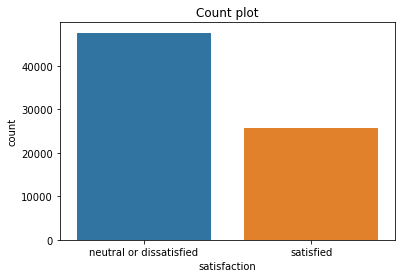

In [24]:
# creating 65:35 imbalance ratio
df_airline_65 = create_imbalance(df_airline,18,65)
balance_ratio(df_airline_65['satisfaction'])

Balance ratio of variable in Percentage
neutral or dissatisfied    75.0
satisfied                  25.0
Name: satisfaction, dtype: float64



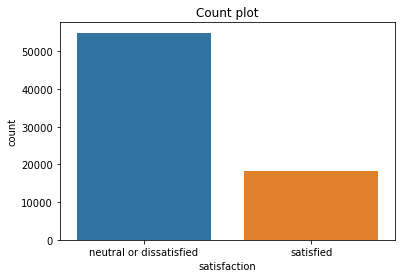

In [25]:
# creating 75:25 imbalance ratio
df_airline_75 = create_imbalance(df_airline,18,75)
balance_ratio(df_airline_75['satisfaction'])

Balance ratio of variable in Percentage
neutral or dissatisfied    90.0
satisfied                  10.0
Name: satisfaction, dtype: float64



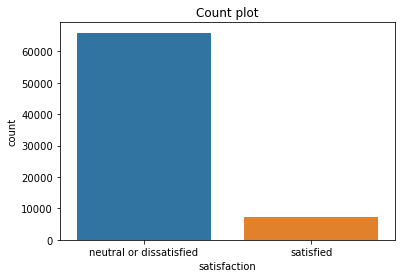

In [26]:
# creating 90:10 imbalance ratio
df_airline_90 = create_imbalance(df_airline,18,90)
balance_ratio(df_airline_90['satisfaction'])

In [27]:
# seperating target and features
X = df_airline_65.drop(columns=['satisfaction'],axis=1)
y = df_airline_65['satisfaction']
print(X.shape)
print(y.shape)

(73225, 23)
(73225,)


In [28]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1, stratify=y)

#checking the shape after spliting
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(58580, 23)
(14645, 23)
(58580,)
(14645,)


In [29]:
# training default model just to see performance measures like confusion matrix and ROC AUC curve 
model = RandomForestClassifier()
parameters = {'n_estimators':[100]}
grid = GridSearchCV(model, param_grid=parameters, cv=5)
test = grid.fit(X_train, y_train)

In [30]:
#checking score of train data
test.score(X_train, y_train)

1.0

In [31]:
#checking score of test data
test.score(X_test, y_test)

0.9661317855923524

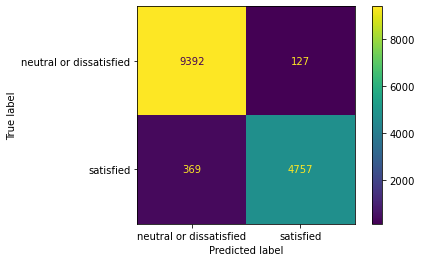

In [32]:
# checking performance by confusion matrix
metrics.plot_confusion_matrix(test,X_test,y_test)
plt.show()

AUC for the Training Data: 1.000
AUC for the Test Data: 0.993


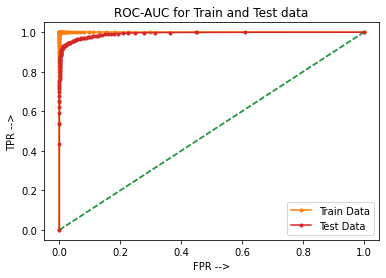

In [33]:
# Training Data Probability Prediction
pred_prob_train_RF_T = test.predict_proba(X_train)
pred_prob_test_RF_T = test.predict_proba(X_test)

#AUC & ROC for Train Data
auc = metrics.roc_auc_score(y_train,pred_prob_train_RF_T[:,1])
print('AUC for the Training Data: %.3f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_RF_T[:,1],pos_label = ['satisfied'])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Train Data')

#AUC & ROC for Test Data
auc = metrics.roc_auc_score(y_test,pred_prob_test_RF_T[:,1])
print('AUC for the Test Data: %.3f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_RF_T[:,1],pos_label = ['satisfied'])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')

plt.legend(loc='best')
plt.xlabel('FPR -->')
plt.ylabel('TPR -->')
plt.title('ROC-AUC for Train and Test data')
plt.show()

In [34]:
ytest_predict = test.predict(X_test)

In [35]:
print(metrics.classification_report(y_test,ytest_predict))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.99      0.97      9519
              satisfied       0.97      0.93      0.95      5126

               accuracy                           0.97     14645
              macro avg       0.97      0.96      0.96     14645
           weighted avg       0.97      0.97      0.97     14645

